# Load Libraries & Raw Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
import multiprocessing

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
# nltk.download('punkt')  # Download tokenization resources
# nltk.download('stopwords')  # Download stopwords
# nltk.download('vader_lexicon')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from googletrans import Translator
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
with open("../data/raw/labelling_data.json", "r") as f:
    json_file = json.load(f)
    
df = pd.DataFrame(json_file)
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[]
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[]
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[]
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[]
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:55:12.281Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Lebih stabil, tampilan lebih ok. Fitur tambah ...",None,None,5.1.28,3,"[{'criteria': 'vaf_phase1_investing', 'rating'..."
12095,647ec3370cf202ac8b723b87,82732419-f328-4efe-b28a-93ef500afe17,2018-04-19T00:02:16.954Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,82732419-f328-4efe-b28a-93ef500afe17,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:02:16.954Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Tampilan keren bingits, fitur dan kebutuhan da...",None,None,5.1.28,1,"[{'criteria': 'vaf_phase1_depositing_checks', ..."
12096,647ec3370cf202ac8b723b88,fe45e44c-58

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12099 entries, 0 to 12098
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             12099 non-null  object
 1   reviewAppId     12099 non-null  object
 2   reviewDatetime  12099 non-null  object
 3   userUrl         12099 non-null  object
 4   replyDatetime   12099 non-null  object
 5   sourceApp       12099 non-null  object
 6   scrapedAt       12099 non-null  object
 7   id              12099 non-null  object
 8   userName        12099 non-null  object
 9   userImage       12099 non-null  object
 10  date            12099 non-null  object
 11  score           12099 non-null  int64 
 12  scoreText       12099 non-null  object
 13  url             12099 non-null  object
 14  title           0 non-null      object
 15  text            12099 non-null  object
 16  replyDate       8787 non-null   object
 17  replyText       8787 non-null   object
 18  versio

In [5]:
# check duplication
df[df.drop(["criterias"], axis=1).duplicated()]

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias


In [6]:
# check duplication
df[df["reviewAppId"].duplicated()]

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias


# Preprocessing Text

In [7]:
df['text_clean'] = df['text'].apply(lambda x: x.lower())
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal. ...
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],"setelah kena error, gak bisa masuk ke aplikasi..."
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],"fitur islami, juz amma, adzan, infaq juga ada ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:55:12.281Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Lebih stabil, tampilan lebih ok. Fitur tambah ...",None,None,5.1.28,3,"[{'criteria': 'vaf_phase1_investing', 'rating'...","lebih stabil, tampilan lebih ok. fitur tambah ..."
12095,647ec3370cf202ac8b723b87,82732419-f328-4efe-b28a-93ef500afe17,2018-04-19T00:02:16.954Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,82732419-f328-4efe-b28a-93ef500afe17,A Google

In [8]:
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+', '', x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'#[A-Za-z0-9]+', '', x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'RT[\s]', '', x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"http\S+", '', x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df['text_clean'] = df['text_clean'].apply(lambda x: x.replace('\n', ' '))
df['text_clean'] = df['text_clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['text_clean'] = df['text_clean'].apply(lambda x: x.strip(' '))   
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal c...
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],setelah kena error gak bisa masuk ke aplikasi ...
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],fitur islami juz amma adzan infaq juga ada di ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:55:12.281Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Lebih stabil, tampilan lebih ok. Fitur tambah ...",None,None,5.1.28,3,"[{'criteria': 'vaf_phase1_investing', 'rating'...",lebih stabil tampilan lebih ok fitur tambah ba...
12095,647ec3370cf202ac8b723b87,82732419-f328-4efe-b28a-93ef500afe17,2018-04-19T00:02:16.954Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,82732419-f328-4efe-b28a-93ef500afe17,A Google user,

In [9]:
# Tokenization function
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Filter stopwords
def filter_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens


# Stemming setup
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming function
def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [10]:
df['text_preprocessed'] = df['text_clean'].apply(tokenize_text)
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean,text_preprocessed
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...,"[saya, pengguna, aplikasi, ini, dan, pengguna,..."
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal c...,"[transfer, susah, klo, copy, rekening, dan, no..."
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],setelah kena error gak bisa masuk ke aplikasi ...,"[setelah, kena, error, gak, bisa, masuk, ke, a..."
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay,"[masih, belum, bisa, top, up, shopeepay]"
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],fitur islami juz amma adzan infaq juga ada di ...,"[fitur, islami, juz, amma, adzan, infaq, juga,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:55:12.281Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Lebih stabil, tampilan lebih ok. Fitur tambah ...",None,None,5.1.28,3,"[{'criteria': 'vaf_phase1_investing', 'rating'...",lebih stabil tampilan lebih ok fitur ta

In [11]:
df['text_preprocessed'] = df['text_preprocessed'].apply(filter_stopwords)
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean,text_preprocessed
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...,"[pengguna, aplikasi, pengguna, hasanah, card, ..."
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal c...,"[transfer, susah, klo, copy, rekening, nominal..."
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],setelah kena error gak bisa masuk ke aplikasi ...,"[kena, error, gak, masuk, aplikasi, disuruh, a..."
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay,"[top, up, shopeepay]"
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],fitur islami juz amma adzan infaq juga ada di ...,"[fitur, islami, juz, amma, adzan, infaq, bsi, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-04-19T00:55:12.281Z,5,5,https://play.google.com/store/apps/details?id=...,None,"Lebih stabil, tampilan lebih ok. Fitur tambah ...",None,None,5.1.28,3,"[{'criteria': 'vaf_phase1_investing', 'rating'...",lebih stabil tampilan lebih ok fitur tambah ba...,"[stabil,

In [12]:
df["text_preprocessed_stemmed"] = df["text_preprocessed"].apply(stem_text)
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean,text_preprocessed,text_preprocessed_stemmed
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...,"[pengguna, aplikasi, pengguna, hasanah, card, ...","[guna, aplikasi, guna, hasanah, card, menumenu..."
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal c...,"[transfer, susah, klo, copy, rekening, nominal...","[transfer, susah, klo, copy, rekening, nominal..."
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],setelah kena error gak bisa masuk ke aplikasi ...,"[kena, error, gak, masuk, aplikasi, disuruh, a...","[kena, error, gak, masuk, aplikasi, suruh, akt..."
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay,"[top, up, shopeepay]","[top, up, shopeepay]"
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],fitur islami juz amma adzan infaq juga ada di ...,"[fitur, islami, juz, amma, adzan, infaq, bsi, ...","[fitur, islami, juz, amma, adzan, infaq, bsi, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00.000Z,google play store,2023-06-06T05:24:33.466Z,184b3bae-a93e-4b3e-8011-20d1669d06f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,2018-

# Explore Labelling Approach
## Labelling based on Rating or Score

In [14]:
# # Define a mapping dictionary for the labels
# label_mapping = {
#     5: "extremely_positive",
#     4: "positive",
#     3: "neutral",
#     2: "negative",
#     1: "extremely_negative"
# }

# # Create a new column "label" using the mapping
# df["label"] = df["score"].map(label_mapping)

df["label_score"] = np.where(df["score"] <= 3, "negative", "positive")

### Comparison Sentiment Polarity on Reviews

In [15]:
df.groupby("label_score")["id"].count()

label_score
negative    5152
positive    6947
Name: id, dtype: int64

### Word Cloud

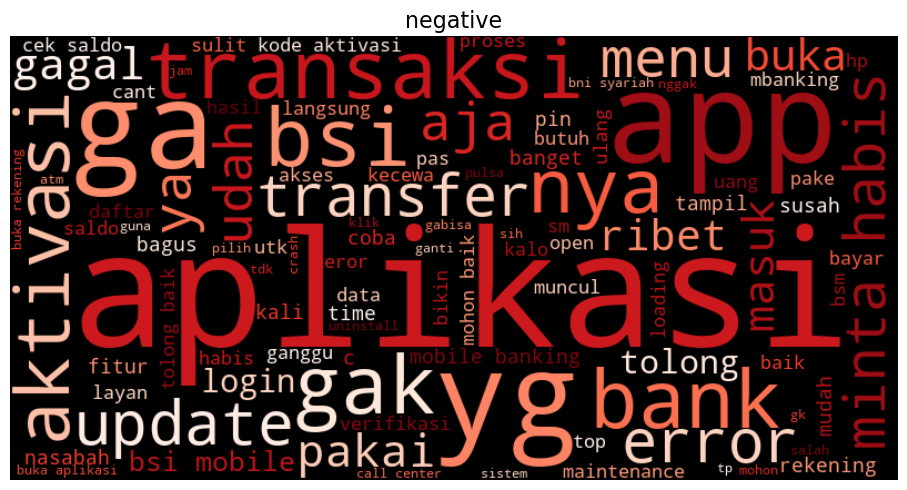

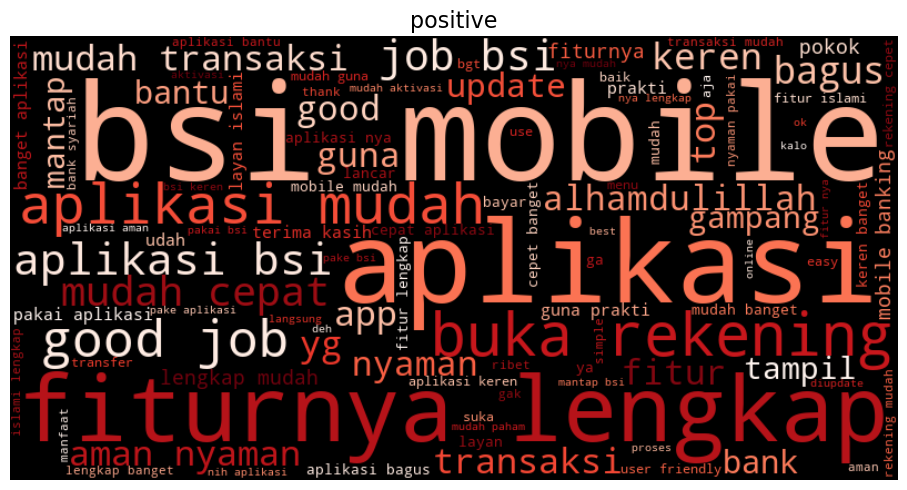

In [16]:
# Group the DataFrame by the "label_inset_score" column
grouped = df.groupby("label_score")

# Iterate over each group and create a word cloud
for label, group in grouped:
    # Convert the list of tokens to a single string
    tokens = group["text_preprocessed_stemmed"].explode().astype(str)
    text = " ".join(tokens)

    # Create a word cloud for the current label
    wordcloud = WordCloud(width=800, height=400, max_words=100, colormap="Reds", min_font_size=10).generate(text)

    # Plot the word cloud with improved readability
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(label, fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Labelling using Indonesia Sentiment Lexicon

In [17]:
# Load positive and negative sentiment lexicons
positive_lexicon = pd.read_csv('../data/inset-lexicon/positive.tsv', delimiter='\t')
negative_lexicon = pd.read_csv('../data/inset-lexicon/negative.tsv', delimiter='\t')

In [18]:
print(positive_lexicon)
print(negative_lexicon)

           word  weight
0           hai       3
1       merekam       2
2     ekstensif       3
3     paripurna       1
4        detail       2
...         ...     ...
3604  melarikan       3
3605    vakansi       3
3606    spesial       4
3607     asrama       3
3608   orisinal       3

[3609 rows x 2 columns]
                      word  weight
0       putus tali gantung      -2
1                  gelebah      -2
2               gobar hati      -2
3     tersentuh (perasaan)      -1
4                     isak      -5
...                    ...     ...
6604        kantong kering      -4
6605             penggaruk      -3
6606               senewen      -4
6607            menetapkan      -5
6608          kacang botor      -3

[6609 rows x 2 columns]


In [19]:
# Stemming setup
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming function
def stem_word(word):
    return stemmer.stem(word)

In [20]:
# Apply stemming to positive and negative lexicons
positive_lexicon['word'] = positive_lexicon['word'].apply(stem_word)
negative_lexicon['word'] = negative_lexicon['word'].apply(stem_word)

In [21]:
print(positive_lexicon)
print(negative_lexicon)

           word  weight
0           hai       3
1         rekam       2
2     ekstensif       3
3     paripurna       1
4        detail       2
...         ...     ...
3604       lari       3
3605    vakansi       3
3606    spesial       4
3607     asrama       3
3608   orisinal       3

[3609 rows x 2 columns]
                    word  weight
0     putus tali gantung      -2
1                gelebah      -2
2             gobar hati      -2
3             sentuh asa      -1
4                   isak      -5
...                  ...     ...
6604      kantong kering      -4
6605               garuk      -3
6606             senewen      -4
6607               tetap      -5
6608        kacang botor      -3

[6609 rows x 2 columns]


In [22]:
# Create a dictionary for quick lookup of weights
positive_weights = dict(zip(positive_lexicon['word'], positive_lexicon['weight']))
negative_weights = dict(zip(negative_lexicon['word'], negative_lexicon['weight']))

# Calculate polarity for each row in the "text_preprocessed_stemmed" column
df['polarity_inset'] = 0  # Initialize polarity column

for idx, row in df.iterrows():
    tokens = row['text_preprocessed_stemmed']
    polarity_score = sum(positive_weights.get(token, 0) + negative_weights.get(token, 0) for token in tokens)
    df.at[idx, 'polarity_inset'] = polarity_score

In [23]:
# df["label_inset"] = pd.cut(df["polarity_inset"], bins=[df["polarity_inset"].min(), -5, 0, 5, df["polarity_inset"].max()], labels=['extremely_negative', 'negative', 'positive', 'extremely_positive'])
df["label_inset"] = np.where(df["polarity_inset"] > 0, "positive", "negative")
df["label_inset"] = np.where(df["polarity_inset"] == 0, "neutral", df["label_inset"])
df

,_id,reviewAppId,reviewDatetime,userUrl,replyDatetime,sourceApp,scrapedAt,id,userName,userImage,date,score,scoreText,url,title,text,replyDate,replyText,version,thumbsUp,criterias,text_clean,text_preprocessed,text_preprocessed_stemmed,label_score,polarity_inset,label_inset
0,647ec3370cf202ac8b720c48,c2f63d8b-0f2e-4669-875e-46dec968bfe3,2023-05-30T14:04:39.572Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:20:33.991Z,google play store,2023-06-06T05:24:33.466Z,c2f63d8b-0f2e-4669-875e-46dec968bfe3,Iral Mohammad,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-30T14:04:39.572Z,4,4,https://play.google.com/store/apps/details?id=...,None,Saya pengguna aplikasi ini dan pengguna Hasana...,2023-05-31T01:20:33.991Z,Assalamualaikum Bapak Iral. Mohon maaf atas ke...,6.17.0,0,[],saya pengguna aplikasi ini dan pengguna hasana...,"[pengguna, aplikasi, pengguna, hasanah, card, ...","[guna, aplikasi, guna, hasanah, card, menumenu...",positive,0,neutral
1,647ec3370cf202ac8b720c49,729c6387-df22-4f26-8335-a05b68cee292,2023-05-30T01:54:10.153Z,https://play.google.com/store/apps/details?id=...,2023-05-31T01:38:16.862Z,google play store,2023-06-06T05:24:33.466Z,729c6387-df22-4f26-8335-a05b68cee292,Ipur 'Abdul Mu'izz,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-30T01:54:10.153Z,1,1,https://play.google.com/store/apps/details?id=...,None,transfer susah klo copy rekening dan nominal. ...,2023-05-31T01:38:16.862Z,Assalamualaikum Bapak Ipur. Mohon maaf atas ke...,6.17.0,0,[],transfer susah klo copy rekening dan nominal c...,"[transfer, susah, klo, copy, rekening, nominal...","[transfer, susah, klo, copy, rekening, nominal...",negative,-12,negative
2,647ec3370cf202ac8b720c4a,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,2023-05-29T13:12:48.291Z,https://play.google.com/store/apps/details?id=...,2023-05-29T13:49:40.690Z,google play store,2023-06-06T05:24:33.466Z,9d91f6ce-2573-4a6d-aaf9-2fc6a011d203,Miss Anis Purwaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,2023-05-29T13:12:48.291Z,2,2,https://play.google.com/store/apps/details?id=...,None,"Setelah kena error, gak bisa masuk ke aplikasi...",2023-05-29T13:49:40.690Z,Assalamualaikum Ibu Anis. Mohon maaf atas keti...,5.21.0,0,[],setelah kena error gak bisa masuk ke aplikasi ...,"[kena, error, gak, masuk, aplikasi, disuruh, a...","[kena, error, gak, masuk, aplikasi, suruh, akt...",negative,-15,negative
3,647ec3370cf202ac8b720c4b,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,2023-05-29T04:04:03.310Z,https://play.google.com/store/apps/details?id=...,2023-05-29T03:58:08.155Z,google play store,2023-06-06T05:24:33.466Z,cfccc98c-fd22-4f57-8560-c31d0cf1c8e5,Bima Setya Dharma,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-29T04:04:03.310Z,1,1,https://play.google.com/store/apps/details?id=...,None,Masih belum bisa top up shopeepay,2023-05-29T03:58:08.155Z,Assalamualaikum Bapak Bima. Mohon maaf atas ke...,6.17.0,1,[],masih belum bisa top up shopeepay,"[top, up, shopeepay]","[top, up, shopeepay]",negative,5,positive
4,647ec3370cf202ac8b720c4c,5b9866ca-39c8-4607-8631-5271721fd43e,2023-05-28T13:37:05.890Z,https://play.google.com/store/apps/details?id=...,2023-05-29T08:23:06.760Z,google play store,2023-06-06T05:24:33.466Z,5b9866ca-39c8-4607-8631-5271721fd43e,Mochammad Rizqi,https://play-lh.googleusercontent.com/a/AAcHTt...,2023-05-28T13:37:05.890Z,1,1,https://play.google.com/store/apps/details?id=...,None,"Fitur islami, juz amma, adzan, infaq juga ada ...",2023-05-29T08:23:06.760Z,Assalamualaikum Bapak Rizqi. Terima kasih atas...,6.17.0,0,[],fitur islami juz amma adzan infaq juga ada di ...,"[fitur, islami, juz, amma, adzan, infaq, bsi, ...","[fitur, islami, juz, amma, adzan, infaq, bsi, ...",negative,-1,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,647ec3370cf202ac8b723b86,184b3bae-a93e-4b3e-8011-20d1669d06f4,2018-04-19T00:55:12.281Z,https://play.google.com/store/apps/details?id=...,1970-01-01T00:00:00

### Comparison Sentiment Polarity Score

In [24]:
df.groupby("label_inset")["id"].count()

label_inset
negative    5693
neutral     1575
positive    4831
Name: id, dtype: int64

### Top 10

#### Positive

In [25]:
df[df["label_inset"] == "positive"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset"]] \
.sort_values(by="polarity_inset", ascending=False) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset
0,2021-06-06T08:36:24.920Z,google play store,tidak bisa buka rekening online baru upload ek...,1,44,positive
1,2022-05-13T08:23:10.770Z,google play store,bagus banget ada fitur alquran dan jadwal shol...,5,41,positive
2,2021-08-18T08:10:05.644Z,google play store,sy transfer bbrp kali dengan memilih bsi ex bn...,2,35,positive
3,2021-07-28T06:22:02.591Z,google play store,apasih banyak harap menunggu org kan mau cepat...,1,32,positive
4,2022-04-06T03:21:21.292Z,google play store,maaf ngasih bintang nya disini baru habis tran...,1,28,positive
5,2021-08-11T12:30:43.180Z,google play store,akses akun sendiri rasanya seperti bukan pemil...,2,28,positive
6,2021-07-09T10:25:36.485Z,google play store,tolong bsi buatkan fitur top up dana ya saat i...,4,27,positive
7,2023-02-26T22:33:04.248Z,google play store,alhamdulillah setelah update bsi mobile lebih ...,5,26,positive
8,2021-06-15T14:19:34.990Z,google play store,alhamdulillah sangat terbantu dengan adanya ap...,5,26,positive
9,2022-04-09T18:11:31.256Z,google play store,aplikasi nya cukup tapi kurang efisien mau kas...,3,26,positive


#### Neutral

In [26]:
df[df["label_inset"] == "neutral"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset"]] \
.sort_values(by="polarity_inset", ascending=False) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset
0,2023-05-30T14:04:39.572Z,google play store,saya pengguna aplikasi ini dan pengguna hasana...,4,0,neutral
1,2021-03-29T06:52:12.319Z,google play store,menyebalkan,1,0,neutral
2,2021-04-02T02:58:06.584Z,google play store,keren,5,0,neutral
3,2021-04-02T17:49:31.515Z,google play store,mobile banking bsi simply and easy to use for ...,5,0,neutral
4,2021-04-04T18:56:29.412Z,google play store,thayib ahsan,5,0,neutral
5,2021-04-07T22:51:51.323Z,google play store,buat lah semakin simpel aktivasinya seperti mb...,3,0,neutral
6,2021-04-13T07:42:17.108Z,google play store,satisfy,4,0,neutral
7,2021-04-14T13:03:13.195Z,google play store,qr code nya gak berfungsi,3,0,neutral
8,2021-04-15T02:05:28.416Z,google play store,mbsi masih kurng ngg ad pembyrn virtualacountnya,1,0,neutral
9,2021-04-25T03:36:37.734Z,google play store,fitur juz amma jadwal solat dihapus aja ngga ...,1,0,neutral


#### Negative

In [27]:
df[df["label_inset"] == "negative"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset"]] \
.sort_values(by="polarity_inset", ascending=True) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset
0,2022-09-24T06:32:11.723Z,google play store,menunya ribet dan menyulitkan saat pindah hp d...,2,-54,negative
1,2021-07-08T11:13:25.522Z,google play store,edit review juli sering banget down aplikasin...,1,-44,negative
2,2022-03-19T04:02:33.104Z,google play store,aplikasi performance bagus namun saat meminta ...,2,-43,negative
3,2021-09-12T00:41:00.734Z,google play store,ribet krn harus selalu input pin setiap pilih ...,1,-42,negative
4,2023-05-09T14:13:00.739Z,google play store,aplikasi yang sangat buruk dua hari ga bisa ak...,1,-41,negative
5,2021-12-02T15:44:57.582Z,google play store,aplikasi hampir selalu bermasalah tiap mau tra...,1,-40,negative
6,2022-02-19T18:41:08.953Z,google play store,di mobil banking saya yang satu lagi request m...,1,-39,negative
7,2022-11-08T01:26:45.529Z,google play store,berhasil login tapi tetep aja permintaan tidak...,1,-39,negative
8,2018-11-23T02:48:36.908Z,google play store,aplikasi terburuk dan pengalaman bank terburuk...,1,-39,negative
9,2023-05-09T13:55:17.349Z,google play store,pertama kali review aplikasi di playstore deng...,1,-38,negative


### Word Cloud

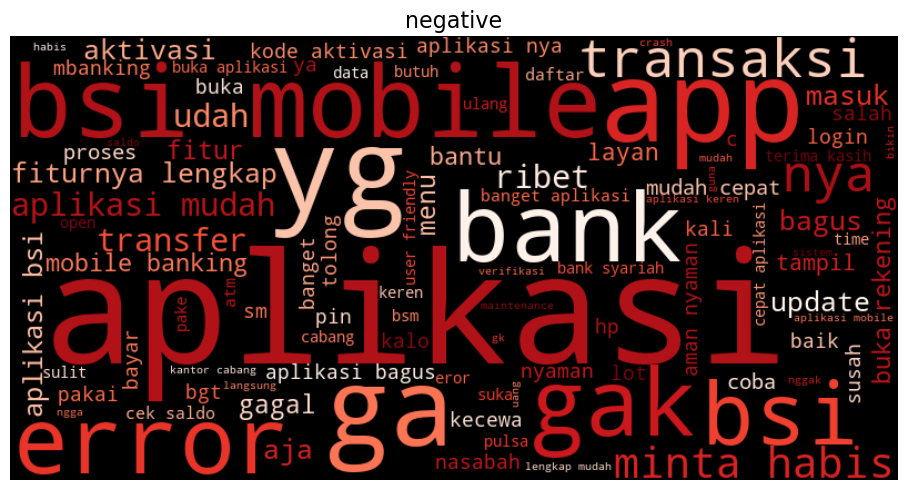

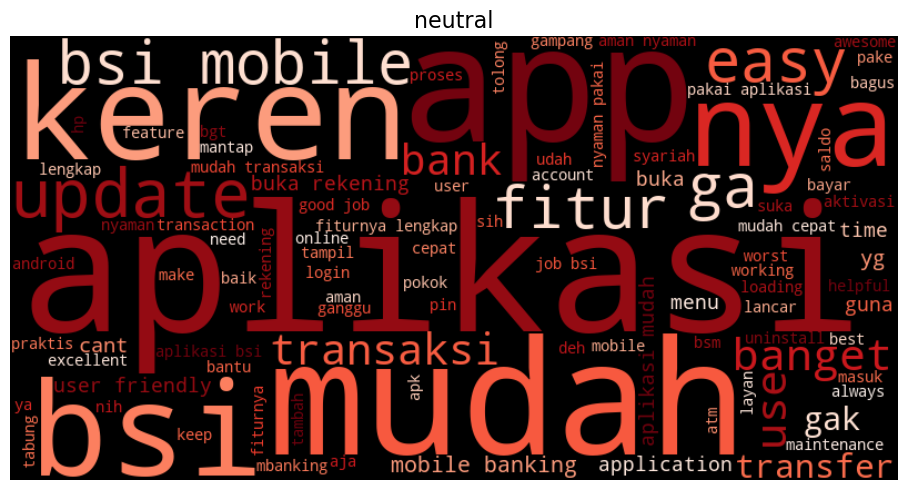

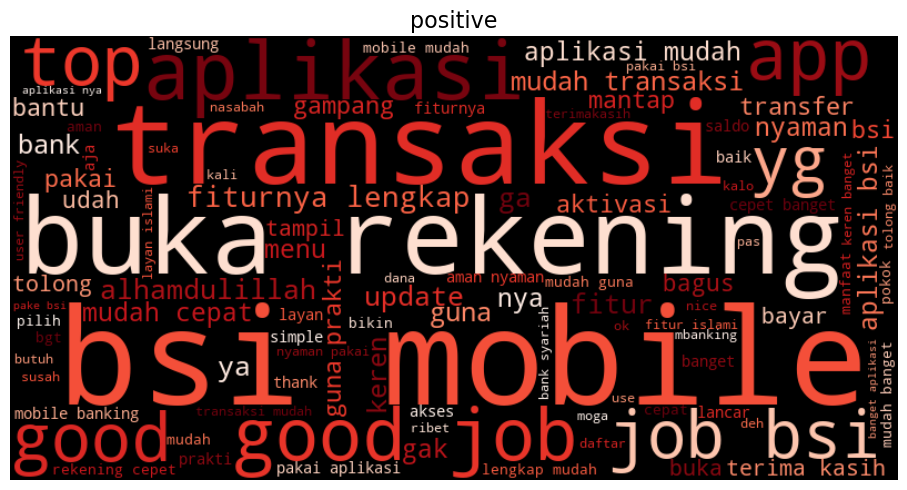

In [28]:
# Group the DataFrame by the "label_inset_score" column
grouped = df.groupby("label_inset")

# Iterate over each group and create a word cloud
for label, group in grouped:
    # Convert the list of tokens to a single string
    tokens = group["text_preprocessed_stemmed"].explode().astype(str)
    text = " ".join(tokens)

    # Create a word cloud for the current label
    wordcloud = WordCloud(width=800, height=400, max_words=100, colormap="Reds", min_font_size=10).generate(text)

    # Plot the word cloud with improved readability
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(label, fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Labelling using Combination Inset & Score

In [29]:
df["label_inset_score"] = np.where(df["polarity_inset"] > 0, "positive", "negative")
df["label_inset_score"] = np.where(df["polarity_inset"] == 0, "neutral", df["label_inset_score"])
df["label_inset_score"] = np.where((df["polarity_inset"] > 0) & (df["score"] <= 3), "neutral", df["label_inset_score"])
df["label_inset_score"] = np.where((df["polarity_inset"] < 0) & (df["score"] >= 4), "neutral", df["label_inset_score"])
df["label_inset_score"] = np.where((df["polarity_inset"] == 0) & (df["score"] == 5), "positive", df["label_inset_score"])
df["label_inset_score"] = np.where((df["polarity_inset"] == 0) & (df["score"] == 1), "negative", df["label_inset_score"])

In [30]:
df.groupby("label_inset_score")["id"].count()

label_inset_score
negative    3712
neutral     3939
positive    4448
Name: id, dtype: int64

In [31]:
df[df["label_inset_score"] == "positive"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset_score"]] \
.sort_values(by="polarity_inset", ascending=False) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset_score
0,2022-05-13T08:23:10.770Z,google play store,bagus banget ada fitur alquran dan jadwal shol...,5,41,positive
1,2021-07-09T10:25:36.485Z,google play store,tolong bsi buatkan fitur top up dana ya saat i...,4,27,positive
2,2023-02-26T22:33:04.248Z,google play store,alhamdulillah setelah update bsi mobile lebih ...,5,26,positive
3,2021-06-15T14:19:34.990Z,google play store,alhamdulillah sangat terbantu dengan adanya ap...,5,26,positive
4,2021-08-28T06:39:26.640Z,google play store,sebagai user baru alhamdulillah buka rekeningn...,5,25,positive
5,2022-03-06T14:18:32.546Z,google play store,alhamdulillah saya bersyukur banget menemukan ...,5,25,positive
6,2023-01-05T11:01:23.125Z,google play store,aku kebetulan pengguna bsi baru dan langsung b...,5,25,positive
7,2022-03-01T10:35:31.913Z,google play store,berguna banget karena transaksinya lancar juga...,5,24,positive
8,2021-02-04T04:44:52.880Z,google play store,alhamdulillah sangat bermanfaat dan sangat ber...,5,23,positive
9,2021-08-27T15:15:40.791Z,google play store,sangat berguna dan praktis mudah untuk aktivas...,5,23,positive


In [32]:
df[df["label_inset_score"] == "neutral"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset_score"]] \
.sort_values(by="polarity_inset", ascending=False) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset_score
0,2021-06-06T08:36:24.920Z,google play store,tidak bisa buka rekening online baru upload ek...,1,44,neutral
1,2021-08-18T08:10:05.644Z,google play store,sy transfer bbrp kali dengan memilih bsi ex bn...,2,35,neutral
2,2021-07-28T06:22:02.591Z,google play store,apasih banyak harap menunggu org kan mau cepat...,1,32,neutral
3,2021-08-11T12:30:43.180Z,google play store,akses akun sendiri rasanya seperti bukan pemil...,2,28,neutral
4,2022-04-06T03:21:21.292Z,google play store,maaf ngasih bintang nya disini baru habis tran...,1,28,neutral
5,2020-07-18T02:39:05.966Z,google play store,aplikasi lambat banget buat dibuka bikin ga sa...,1,26,neutral
6,2022-04-09T18:11:31.256Z,google play store,aplikasi nya cukup tapi kurang efisien mau kas...,3,26,neutral
7,2022-03-16T08:29:03.601Z,google play store,mohon bantuannya jika ada nasabah mencantumkan...,2,23,neutral
8,2021-08-19T13:18:41.949Z,google play store,rating saya sebelumnya kenapa hilang ya jadi t...,1,22,neutral
9,2023-04-20T02:14:47.526Z,google play store,assalamualaikum sejak awal mengunakan bsi saya...,1,22,neutral


In [33]:
df[df["label_inset_score"] == "neutral"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset_score"]] \
.sort_values(by="polarity_inset", ascending=True) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset_score
0,2019-03-05T02:05:32.993Z,google play store,aplikasinya bagus mudah dan lengkap kekurangan...,4,-34,neutral
1,2021-07-16T16:23:51.571Z,google play store,fitur dan ui aplikasinya bagus dan berjalan ba...,4,-32,neutral
2,2019-12-08T05:25:10.918Z,google play store,saya baru mendaftar melalui aplikasi terdapat ...,5,-31,neutral
3,2021-10-10T06:45:18.762Z,google play store,ini mantep sih salah satu aplikasi mobile bank...,5,-30,neutral
4,2019-03-03T13:42:00.251Z,google play store,update terakhir makin bagus sekuritinya tamba...,5,-29,neutral
5,2021-07-16T14:28:26.690Z,google play store,aplikasi ini aman dan nyaman digunakan aslii m...,5,-25,neutral
6,2021-08-12T01:15:32.567Z,google play store,saya ex nasabah bri syariah yg sekarang gabung...,5,-25,neutral
7,2022-12-14T06:14:38.244Z,google play store,makin kesini bsi makin canggih aplikasinya mud...,5,-25,neutral
8,2021-10-27T02:29:03.664Z,google play store,aplikasinya mempermudah pemakaian ngga perlu r...,5,-24,neutral
9,2022-08-25T02:13:52.625Z,google play store,aplikasi sangat bagus karena sudah mengikuti p...,4,-24,neutral


In [34]:
df[df["label_inset_score"] == "negative"][["reviewDatetime", "sourceApp", "text_clean", "score", "polarity_inset", "label_inset_score"]] \
.sort_values(by="polarity_inset", ascending=True) \
.iloc[:10].reset_index(drop=True)

,reviewDatetime,sourceApp,text_clean,score,polarity_inset,label_inset_score
0,2022-09-24T06:32:11.723Z,google play store,menunya ribet dan menyulitkan saat pindah hp d...,2,-54,negative
1,2021-07-08T11:13:25.522Z,google play store,edit review juli sering banget down aplikasin...,1,-44,negative
2,2022-03-19T04:02:33.104Z,google play store,aplikasi performance bagus namun saat meminta ...,2,-43,negative
3,2021-09-12T00:41:00.734Z,google play store,ribet krn harus selalu input pin setiap pilih ...,1,-42,negative
4,2023-05-09T14:13:00.739Z,google play store,aplikasi yang sangat buruk dua hari ga bisa ak...,1,-41,negative
5,2021-12-02T15:44:57.582Z,google play store,aplikasi hampir selalu bermasalah tiap mau tra...,1,-40,negative
6,2022-02-19T18:41:08.953Z,google play store,di mobil banking saya yang satu lagi request m...,1,-39,negative
7,2018-11-23T02:48:36.908Z,google play store,aplikasi terburuk dan pengalaman bank terburuk...,1,-39,negative
8,2022-11-08T01:26:45.529Z,google play store,berhasil login tapi tetep aja permintaan tidak...,1,-39,negative
9,2023-05-09T13:55:17.349Z,google play store,pertama kali review aplikasi di playstore deng...,1,-38,negative


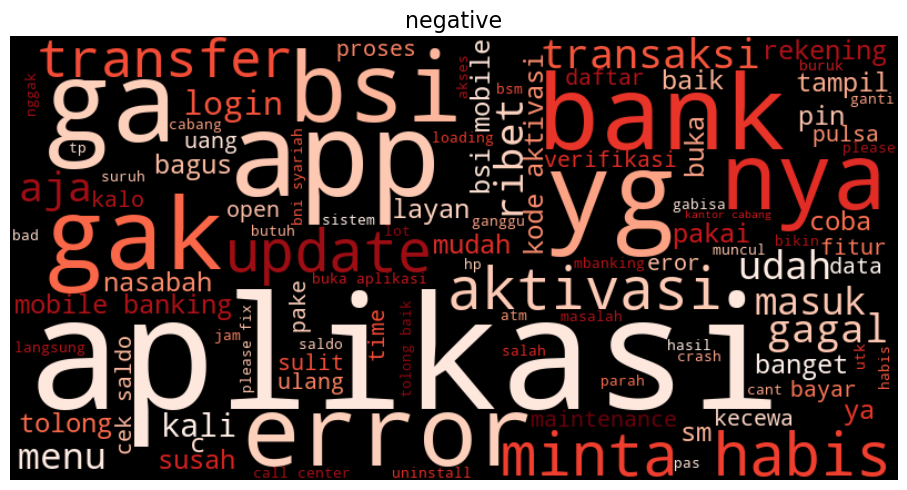

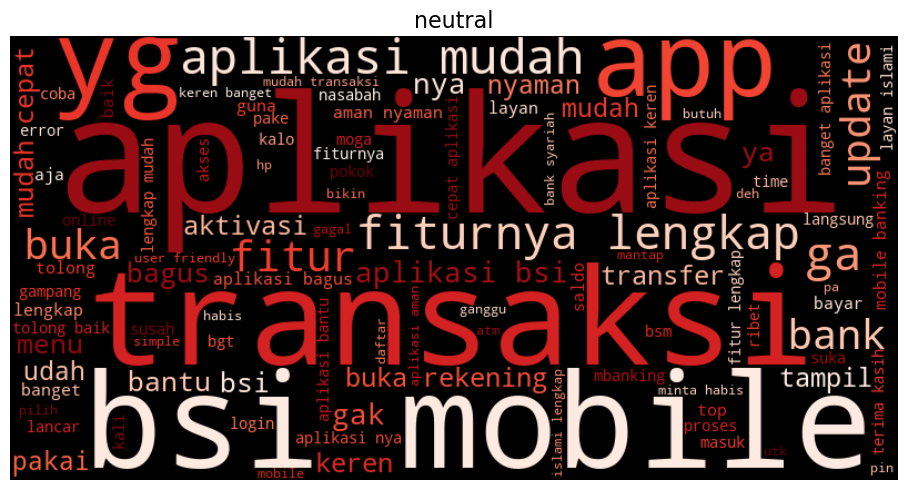

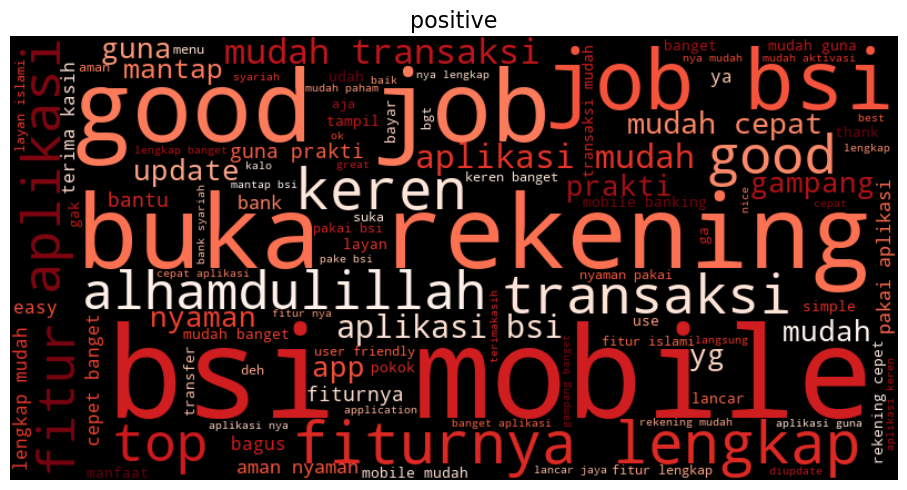

In [35]:
# Group the DataFrame by the "label_inset_score" column
grouped = df.groupby("label_inset_score")

# Iterate over each group and create a word cloud
for label, group in grouped:
    # Convert the list of tokens to a single string
    tokens = group["text_preprocessed_stemmed"].explode().astype(str)
    text = " ".join(tokens)

    # Create a word cloud for the current label
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="black", colormap="Reds").generate(text)

    # Plot the word cloud with improved readability
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(label, fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Labelling using Kmeans Approach

## Labelling using DBSCAN Approach

# Evaluation Approach

In [ ]:
pd.set_option("display.max_rows", 12100)
df[["text_clean", "label_score", "label_inset", "label_inset_score"]]